# Salinity Plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import time
%matplotlib inline
from salishsea_tools import utilities
import errno
import os
import sys
from datetime import datetime, timedelta
from dateutil.parser import parse

<h2>Heat maps of salinity profiles (depth) vs. time over output record for all three locations</h2>

<h2>Heat maps of vertical velocity (depth) vs. time over output record for all three locations (use red-blue scale with white zero)</h2>

In [2]:
def _convert_timestamp(time):
    """Convert datetime.datetime to string in datetime64[s] format
    :arg time: datetime.datetime object
    :return datetime64: str in datetime64[s] format
    """
    year, month, day, hour, minute, second = str(time.year), str(time.month), str(time.day), str(time.hour), str(time.minute), str(time.second)
    if len(month) < 2:
        month = '0' + month
    if len(day) < 2:
        day = '0' + day
    if len(hour) < 2:
        hour = '0' + hour
    if len(minute) < 2:
        minute = '0' + minute
    if len(second) < 2:
        second = '0' + second
    datetime64 = '{}-{}-{}T{}:{}:{}'.format(year, month, day, hour, minute, second)
    return datetime64

In [41]:
class vertical_velocities():
    def __init__(self, xr_path, begin=None, end=None, top=None, bottom=None, plot_max=None):         
        xr_file = xr.open_dataset(xr_path)
        self.xr_file = xr_file
        self.begin_time = begin
        self.end_time = end
        self.__time_slice__()
        self.top_depth = top
        self.bottom_depth = bottom
        self.__depth_slice__()
        self.__slice__()
        self.__plot__()
        
    def data(self):
        return self.current_view
        
    def __plot__(self):
        self.current_view.T.plot()
        plt.gca().invert_yaxis()
    
    def __slice__(self):
        attrs = (self.xr_file, self.begin_time, self.end_time, self.top_depth, self.bottom_depth)
        xr_file, begin_time, end_time, top_depth, bottom_depth = attrs
        self.current_view = xr_file.vovecrtz.sel(
            time_counter = slice(begin_time, end_time)
        ).isel(
            depthw = slice(top_depth, bottom_depth)
        )
    
    def __reset__(self):
        self.begin_time = None
        self.end_time = None
        self.top_depth = None
        self.bottom_depth = None
    
    def __time_slice__(self):
        begin, end = self.begin_time, self.end_time
        if (begin is None) and (end is None):
            self.begin_time = str(self.xr_file.time_counter[0].values)
            self.end_time = str(self.xr_file.time_counter[-1].values)
        elif (begin is None) and (end is not None):
            self.begin_time = str(self.xr_file.time_counter[0].values)
            self.end_time = _convert_timestamp(parse(end))
        elif (begin is not None) and (end is None):
            self.begin_time = _convert_timestamp(parse(begin))
            self.end_time = str(self.xr_file.time_counter[-1].values)
        else:
            daterange = [parse(t) for t in [begin, end]]
            assert(np.diff(daterange)[0].days >= 0), "Invalid Date Range"
            self.begin_time = _convert_timestamp(daterange[0])
            self.end_time = _convert_timestamp(daterange[1])
    
    def __depth_slice__(self):      
        begin, end = self.top_depth, self.bottom_depth
        assert((type(i) is int or None) for i in (begin, end)), "Depth slices are integers [0,39], or None"
        if (begin is None) and (end is None):
            self.begin_depth = 0
            self.end_depth = 39
        elif (begin is None):
            assert(0 <= end <= 39), "bottom_depth_depth must be in [0,39]"
            self.begin_depth = 0
        elif (end is None):
            assert(0 <= begin <= 39), "top_depth must be in [0,39]"
            self.end_depth = 39
        else:
            assert(end-begin >= 0), "End must be larger than begin"

    def __plot_max__(self):
        xrfile = self.xr_file
        data = np.abs(xrfile.vovecrtz.values)
        time = xrfile.time_counter.values
        depths = xrfile.depthw.values
        max_depths = []
        for i in data:
            max_depths.append(float(depths[np.where(i == i.max())][0]))
        plt.plot(time, max_depths)

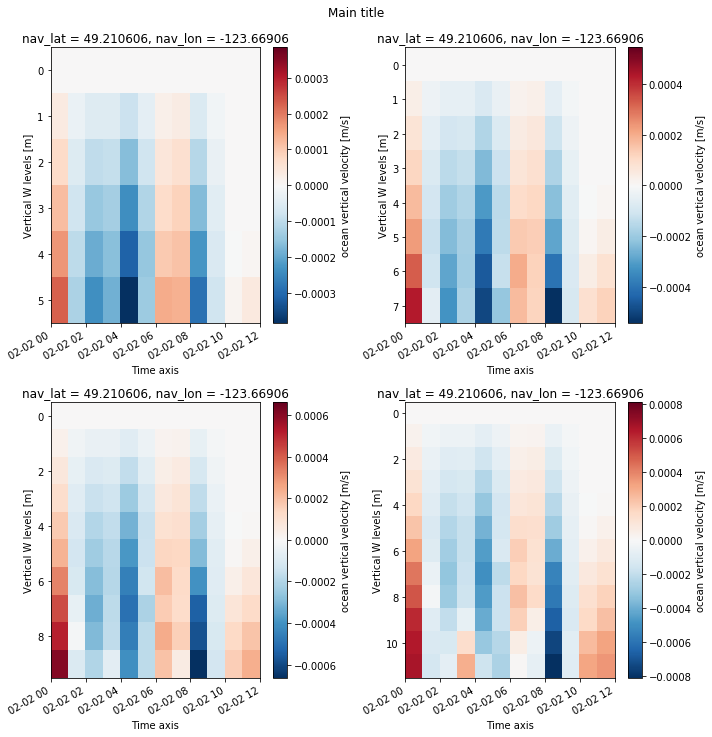

In [42]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
a = vertical_velocities('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 6, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')
ax1 = plt.subplot(2,2,2)
a = vertical_velocities('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 8, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')
ax2 = plt.subplot(2,2,3)
a = vertical_velocities('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 10, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')
ax3 = plt.subplot(2,2,4)
a = vertical_velocities('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 12, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')
plt.suptitle('Main title', y=1.02)
plt.tight_layout()

In [43]:
a.data()

<xarray.DataArray 'vovecrtz' (time_counter: 12, depthw: 12)>
array([[ 2.127669e-09,  3.561978e-05,  7.383771e-05,  1.174551e-04,
         1.712857e-04,  2.309897e-04,  3.287798e-04,  4.322031e-04,
         5.128869e-04,  6.105853e-04,  6.492772e-04,  6.727859e-04],
       [ 2.972430e-09, -2.676817e-05, -5.280766e-05, -7.768244e-05,
        -1.007696e-04, -1.227476e-04, -1.072543e-04, -5.568787e-05,
        -1.420828e-05, -9.528884e-05, -1.260532e-04, -1.439470e-04],
       [ 2.911832e-09, -4.990362e-05, -9.872800e-05, -1.459655e-04,
        -1.918735e-04, -2.370951e-04, -2.846901e-04, -3.230506e-04,
        -2.922619e-04, -1.976569e-04, -1.329647e-04, -8.071918e-05],
       [ 2.292880e-09, -4.836560e-05, -9.301616e-05, -1.313915e-04,
        -1.621696e-04, -1.850976e-04, -1.892430e-04, -1.720443e-04,
        -1.692478e-04, -6.841303e-05,  1.441172e-04,  2.934446e-04],
       [ 2.110558e-09, -8.227108e-05, -1.624838e-04, -2.391832e-04,
        -3.120320e-04, -3.848440e-04, -4.543809e-04

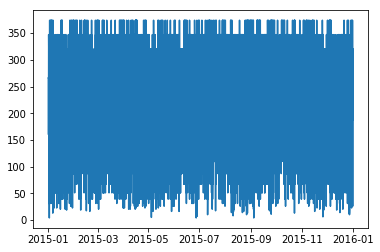

In [225]:
a.plot_max()